In [14]:
import pandas as pd
import numpy as np


Here , Original dataset is ['Dataset.csv'] and we will be making changes in ['train.csv']so as to keep original data set safe

In [15]:
train = pd.read_csv('Dataset/train.csV')
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [16]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### Features Type
1. Categorical(5) : Gender , Married , Education , Self_Employed , Credit_HIstory
2. Ordinal(2) : Dependents , Property_Area
3. Numerical(4) : ApplicantIncome , CoapplicantIncome , LoanAmount , Loan_Amount_Term

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# DATA CLEANING
1. Wrong Data - None
2. Missing values - Present
3. Wrong Format - None
4. Outliers - Present

In [18]:
Missing_values =pd.DataFrame(train.isnull().sum())
Missing_values

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


# WE CAN SEE THE NUMBER OF MISSING VALUES IN EACH COLUMN
1. NOw, fill missing values using appropriate techniques like mean() , median() , mode() .
2. use suitable technique for filling the column from Above techniques

In [19]:
# lets first fill the gender column missing values
# we can see that Gender has only 2 vals male and female most appropriate way to fill in missing value will be mode()
train['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
train['Gender'].isnull().sum()

0

##### Gender column's null values have been filled likewise will do with rest of the colums with null values depending on their column type and values
1. For categorical and Ordinal features like Gender ,Married , Education, Self_Employed, Credit_History we are using mode()
2. For Numerical variables we can use mean() and median()

In [20]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
train['Married'].fillna(train['Married'].mode()[0],inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace = True)




#### Lets check whether the values have been field or not

In [21]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

For LoanAMount lets see the values in it first

In [22]:
train['LoanAmount'].value_counts()


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64

1. As we can see that LoanAMount is  a numerical feature and we can't see any values with a significant count . 
2. We know that we have outliers in LoanAmount Feature so we can't fill missing values using mean() 
3. so, median() seems suitable for this scenario

In [23]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace = True)
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Loan_Amount_Term is also a numerical feature lets first observe its values

In [24]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

1. we can see that 360 value has been repeated numerous times so rather then mean or median here mode will be the mose prefered way for filling missing values 

In [25]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace = True)
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### OUTLIERS REMOVAL

##### In univariate analysis we saw outliers exist we have to treat em all as it can affect distribution of data
1. outliers often has a significant effect on the mean and standard deviation.
2. Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. 


In [27]:
import pandas as pd
a = pd.read_csv('Dataset/Dataset.csv')
a.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

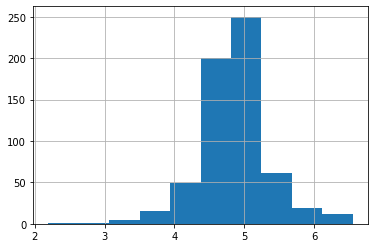

In [28]:
train['LoanAmount_Log'] = np.log(train['LoanAmount'])
train['LoanAmount_Log'].hist()
# test['loanAmount_Log'] = np.log(test['LoanAmount'])
